In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import os

In [50]:
parent_dir = os.path.abspath(os.path.join('','..'))
path = os.path.join(parent_dir, 'data/features/')
path_features_clear = os.path.join(path, 'features_clear.csv')
path_features_obfuscated = os.path.join(path, 'features_obfuscated.csv')
    
df_clear = pd.read_csv(path_features_clear, index_col=0)
df_clear = df_clear.drop(columns='file_name')
df_obfuscated = pd.read_csv(path_features_obfuscated, index_col=0)
df_obfuscated = df_obfuscated.drop(columns='file_name')

In [51]:
type(df_obfuscated)

pandas.core.frame.DataFrame

In [52]:
tsne = TSNE(perplexity=40, random_state=0)

df_obfuscated = StandardScaler().fit_transform(df_obfuscated)
embs_obfuscated = tsne.fit_transform(df_obfuscated)

df_clear = StandardScaler().fit_transform(df_clear) 
embs_clear = tsne.fit_transform(df_clear)


/Users/olyapashneva/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/olyapashneva/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/olyapashneva/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/olyapashneva/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


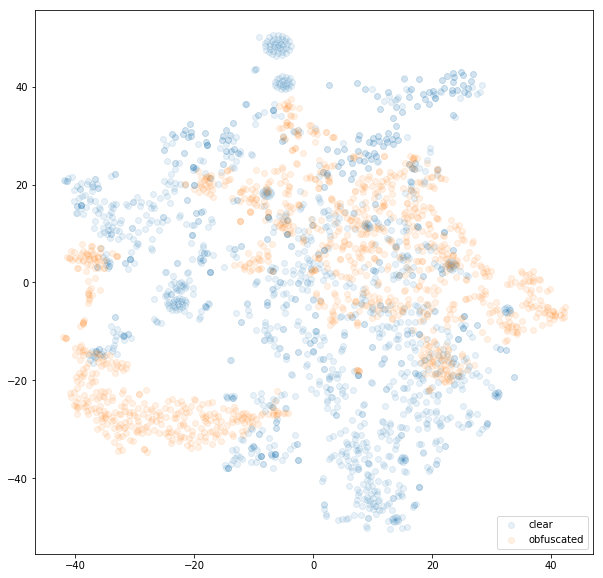

In [54]:
plot_data = (embs_clear, embs_obfuscated)
FS = (10, 10)
colors = ["red", "green"]
groups = ["clear", "obfuscated"]
fig, ax = plt.subplots(figsize=FS)

ax.scatter(embs_clear[:, 0], embs_clear[:, 1], alpha=.1, label=groups[0])
ax.scatter(embs_obfuscated[:, 0], embs_obfuscated[:, 1], alpha=.1, label=groups[1])
ax.legend(loc=4)